In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re
import json
import random
import time
import pickle
from brokenaxes import brokenaxes
from striprtf.striprtf import rtf_to_text
from glob import glob
from multiprocessing import Pool
from scipy.io import mmread
from collections import OrderedDict
#import scanpy as sc
import pandas as pd
from scipy.stats.mstats import gmean
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, zscore, ttest_ind, ranksums, spearmanr, fisher_exact
import os, sys
import statsmodels.api as sm
from copy import deepcopy
import numpy as np
from scipy.sparse import csr_matrix
from collections import Counter, defaultdict

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
from scipy import stats
from tqdm import tqdm
import glob
import os
from statannotations.Annotator import Annotator

plt.rcParams['font.family'] = ['font.sans-serif'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
sns.set_style('whitegrid',{'font.sans-serif':['Arial']})

### Figure 1e Size distribution of tumor-derived and non-tumor-derived cell-free eccDNA identified from PDX mouse plasma

In [2]:
df = pd.read_csv('/home/luosongwen/scantecc/2025_03_10_Figure_result/Figure/Figure2B/mm_hs_ratio.txt', delimiter='\t')

In [3]:
df

,Unnamed: 0,"(0.0, 0.05]","(0.05, 0.1]","(0.1, 0.15]","(0.15, 0.2]","(0.2, 0.25]","(0.25, 0.3]","(0.3, 0.35]","(0.35, 0.4]","(0.4, 0.45]",...,"(4.45, 4.5]","(4.5, 4.55]","(4.55, 4.6]","(4.6, 4.65]","(4.65, 4.7]","(4.7, 4.75]","(4.75, 4.8]","(4.8, 4.85]","(4.85, 4.9]","(4.9, 4.95]"
0,R22041543-T266-HG1471combined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,R22041543-T266-HG1467combined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,R22041543-T266-HG1470combined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.005917,0.000000,0.000000,0.000000,0.000000,0.000000,0.005917,0.000000,0.000000
3,R22041543-T266-HG1469combined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000098,0.000000,0.000294,0.000098,0.000000,0.000098,0.000098,0.000393,0.000196,0.000098
4,R22041543-T266-HG1468combined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004926,0.000000,0.000000,0.000000
5,R22041543-T266-HG1466combined,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.003817,0.000000,0.000000,0.000000,0.000000,0.000000,0.003817,0.000000,0.000000
6,mouseR22041543-T266-HG1471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000524,0.000000,0.000000,0.000524,0.000000
7,mouseR22041543-T266-HG1470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,mouseR22041543-T266-HG1467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011494,0.000000,0.000000,0.000000,0.000000,0.022989,0.000000,0.000000,0.000000,0.000000
9,mouseR22041543-T266-HG1466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000819,0.000000


In [4]:
filtered_df = df.drop(df.columns[list(range(1, 21)) + list(range(-18, 0))], axis=1)

In [5]:
filtered_df

,Unnamed: 0,"(1.0, 1.05]","(1.05, 1.1]","(1.1, 1.15]","(1.15, 1.2]","(1.2, 1.25]","(1.25, 1.3]","(1.3, 1.35]","(1.35, 1.4]","(1.4, 1.45]",...,"(3.55, 3.6]","(3.6, 3.65]","(3.65, 3.7]","(3.7, 3.75]","(3.75, 3.8]","(3.8, 3.85]","(3.85, 3.9]","(3.9, 3.95]","(3.95, 4.0]","(4.0, 4.05]"
0,R22041543-T266-HG1471combined,0.00000,0.000000,0.000000,0.000000,0.004329,0.012987,0.000000,0.000000,0.000000,...,0.000000,0.012987,0.004329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004329
1,R22041543-T266-HG1467combined,0.00000,0.000000,0.000000,0.005587,0.005587,0.005587,0.000000,0.000000,0.000000,...,0.011173,0.000000,0.011173,0.000000,0.005587,0.000000,0.000000,0.000000,0.000000,0.000000
2,R22041543-T266-HG1470combined,0.00000,0.000000,0.005917,0.000000,0.005917,0.011834,0.000000,0.005917,0.000000,...,0.011834,0.000000,0.005917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,R22041543-T266-HG1469combined,0.00000,0.000000,0.000196,0.000098,0.000000,0.000294,0.000196,0.000196,0.000196,...,0.000883,0.000687,0.000294,0.000098,0.000294,0.000294,0.000196,0.000294,0.000000,0.000000
4,R22041543-T266-HG1468combined,0.00000,0.000000,0.000000,0.000000,0.004926,0.004926,0.000000,0.000000,0.000000,...,0.014778,0.004926,0.000000,0.000000,0.000000,0.004926,0.000000,0.000000,0.000000,0.004926
5,R22041543-T266-HG1466combined,0.00000,0.003817,0.003817,0.000000,0.000000,0.015267,0.003817,0.007634,0.000000,...,0.000000,0.011450,0.000000,0.000000,0.007634,0.000000,0.003817,0.000000,0.000000,0.000000
6,mouseR22041543-T266-HG1471,0.00000,0.000000,0.000000,0.000000,0.000000,0.001048,0.000524,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,mouseR22041543-T266-HG1470,0.00000,0.000000,0.000000,0.000000,0.002545,0.002545,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,mouseR22041543-T266-HG1467,0.00000,0.000000,0.000000,0.011494,0.011494,0.057471,0.022989,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,mouseR22041543-T266-HG1466,0.00000,0.000000,0.000000,0.000000,0.000000,0.001638,0.000819,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# 提取列名（区间）
intervals = filtered_df.columns[1:]

# 初始化用于存储mouse和human数据的列表
mouse_data = []
human_data = []

# 遍历数据行，根据第一列前五个字符分类为mouse和human
for index, row in filtered_df.iterrows():
    if row[0][:5].lower() == 'mouse':
        mouse_data.append(row[1:].values.astype(float))
    else:
        human_data.append(row[1:].values.astype(float))

# 将列表转换为NumPy数组
mouse_data = np.array(mouse_data)
human_data = np.array(human_data)

# 计算平均值和标准差
mouse_mean = mouse_data.mean(axis=0)
mouse_std = mouse_data.std(axis=0)
human_mean = human_data.mean(axis=0)
human_std = human_data.std(axis=0)

# 五点平滑处理
def smooth(y, box_pts):
    box = np.ones(box_pts) / box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

mouse_mean_smooth = smooth(mouse_mean, 5)
human_mean_smooth = smooth(human_mean, 5)

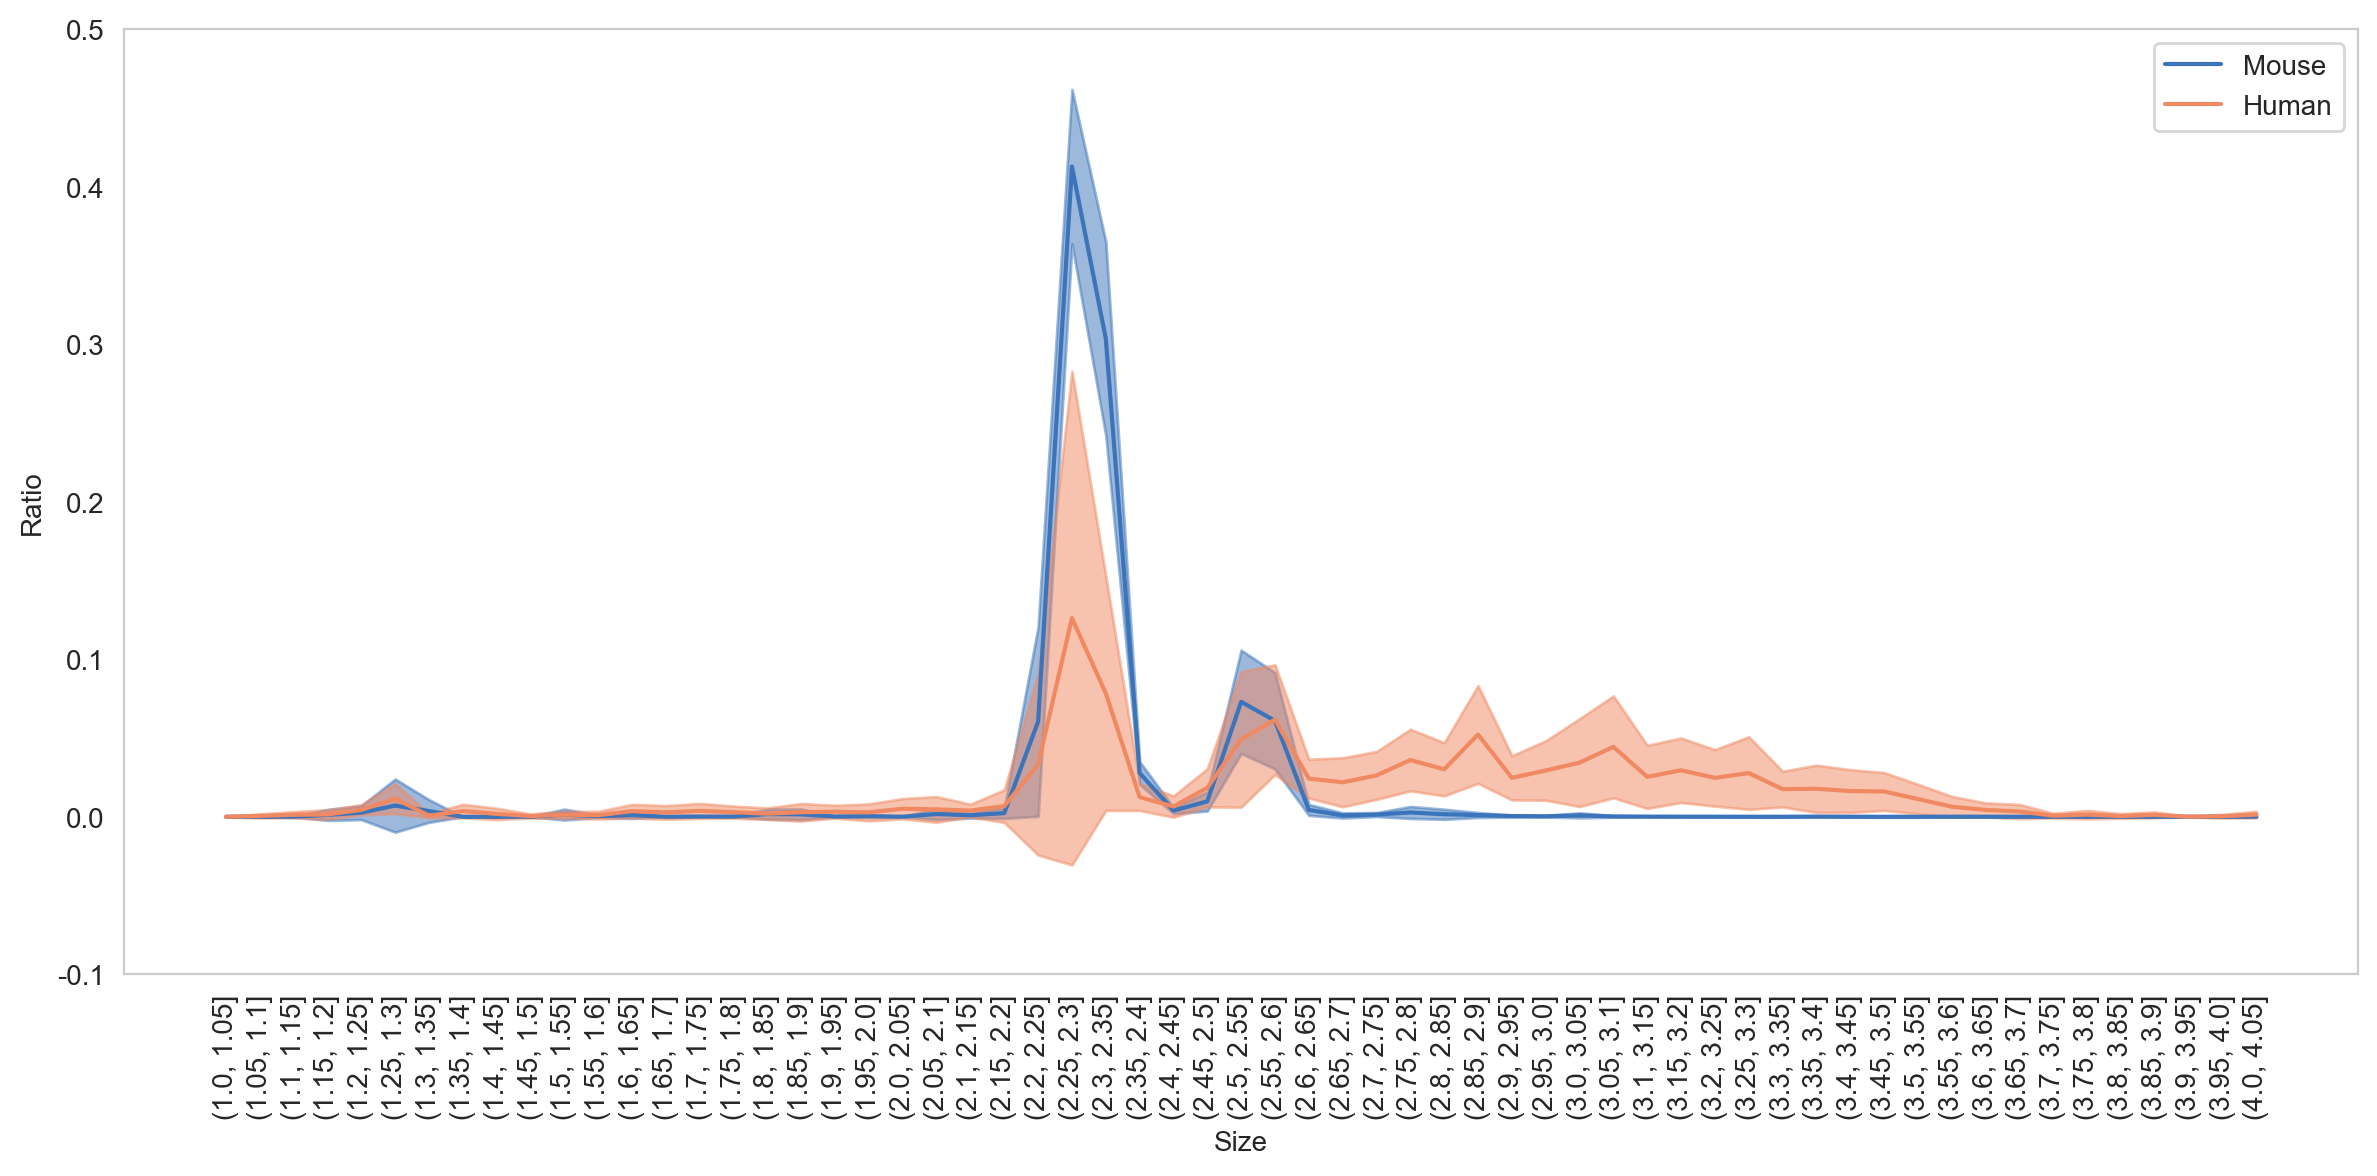

In [7]:
# 设置X轴坐标
x_coords = np.arange(len(intervals))

# 绘制图表
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制mouse数据的平均值和标准差
ax.plot(x_coords, mouse_mean, label='Mouse', color="#3B74BA")
ax.fill_between(x_coords, mouse_mean - mouse_std, mouse_mean + mouse_std, color="#3B74BA", alpha=0.5)

# 绘制human数据的平均值和标准差
ax.plot(x_coords, human_mean, label='Human', color="#F08961")
ax.fill_between(x_coords, human_mean - human_std, human_mean + human_std, color="#F08961", alpha=0.5)
ax.set_ylim([-0.1,0.5])

# 设置标签和标题
ax.set_xlabel('Size')
ax.set_ylabel('Ratio')
#ax.set_title('Mean and Standard Deviation of Mouse and Human Data')
ax.legend()

# 设置X轴刻度和标签
ax.set_xticks(x_coords)
ax.set_xticklabels(intervals, rotation=90)

# 旋转X轴标签以便于阅读
#plt.xticks(rotation=90)
plt.grid(False)

# 显示图表
plt.tight_layout()

#plt.savefig('/home/qukun/luosongwen/liuke/Figure_revised/Figure2B/fig2B.pdf',bbox_inches='tight')
plt.show()

Matched indices: [0, 20, 40, 60]


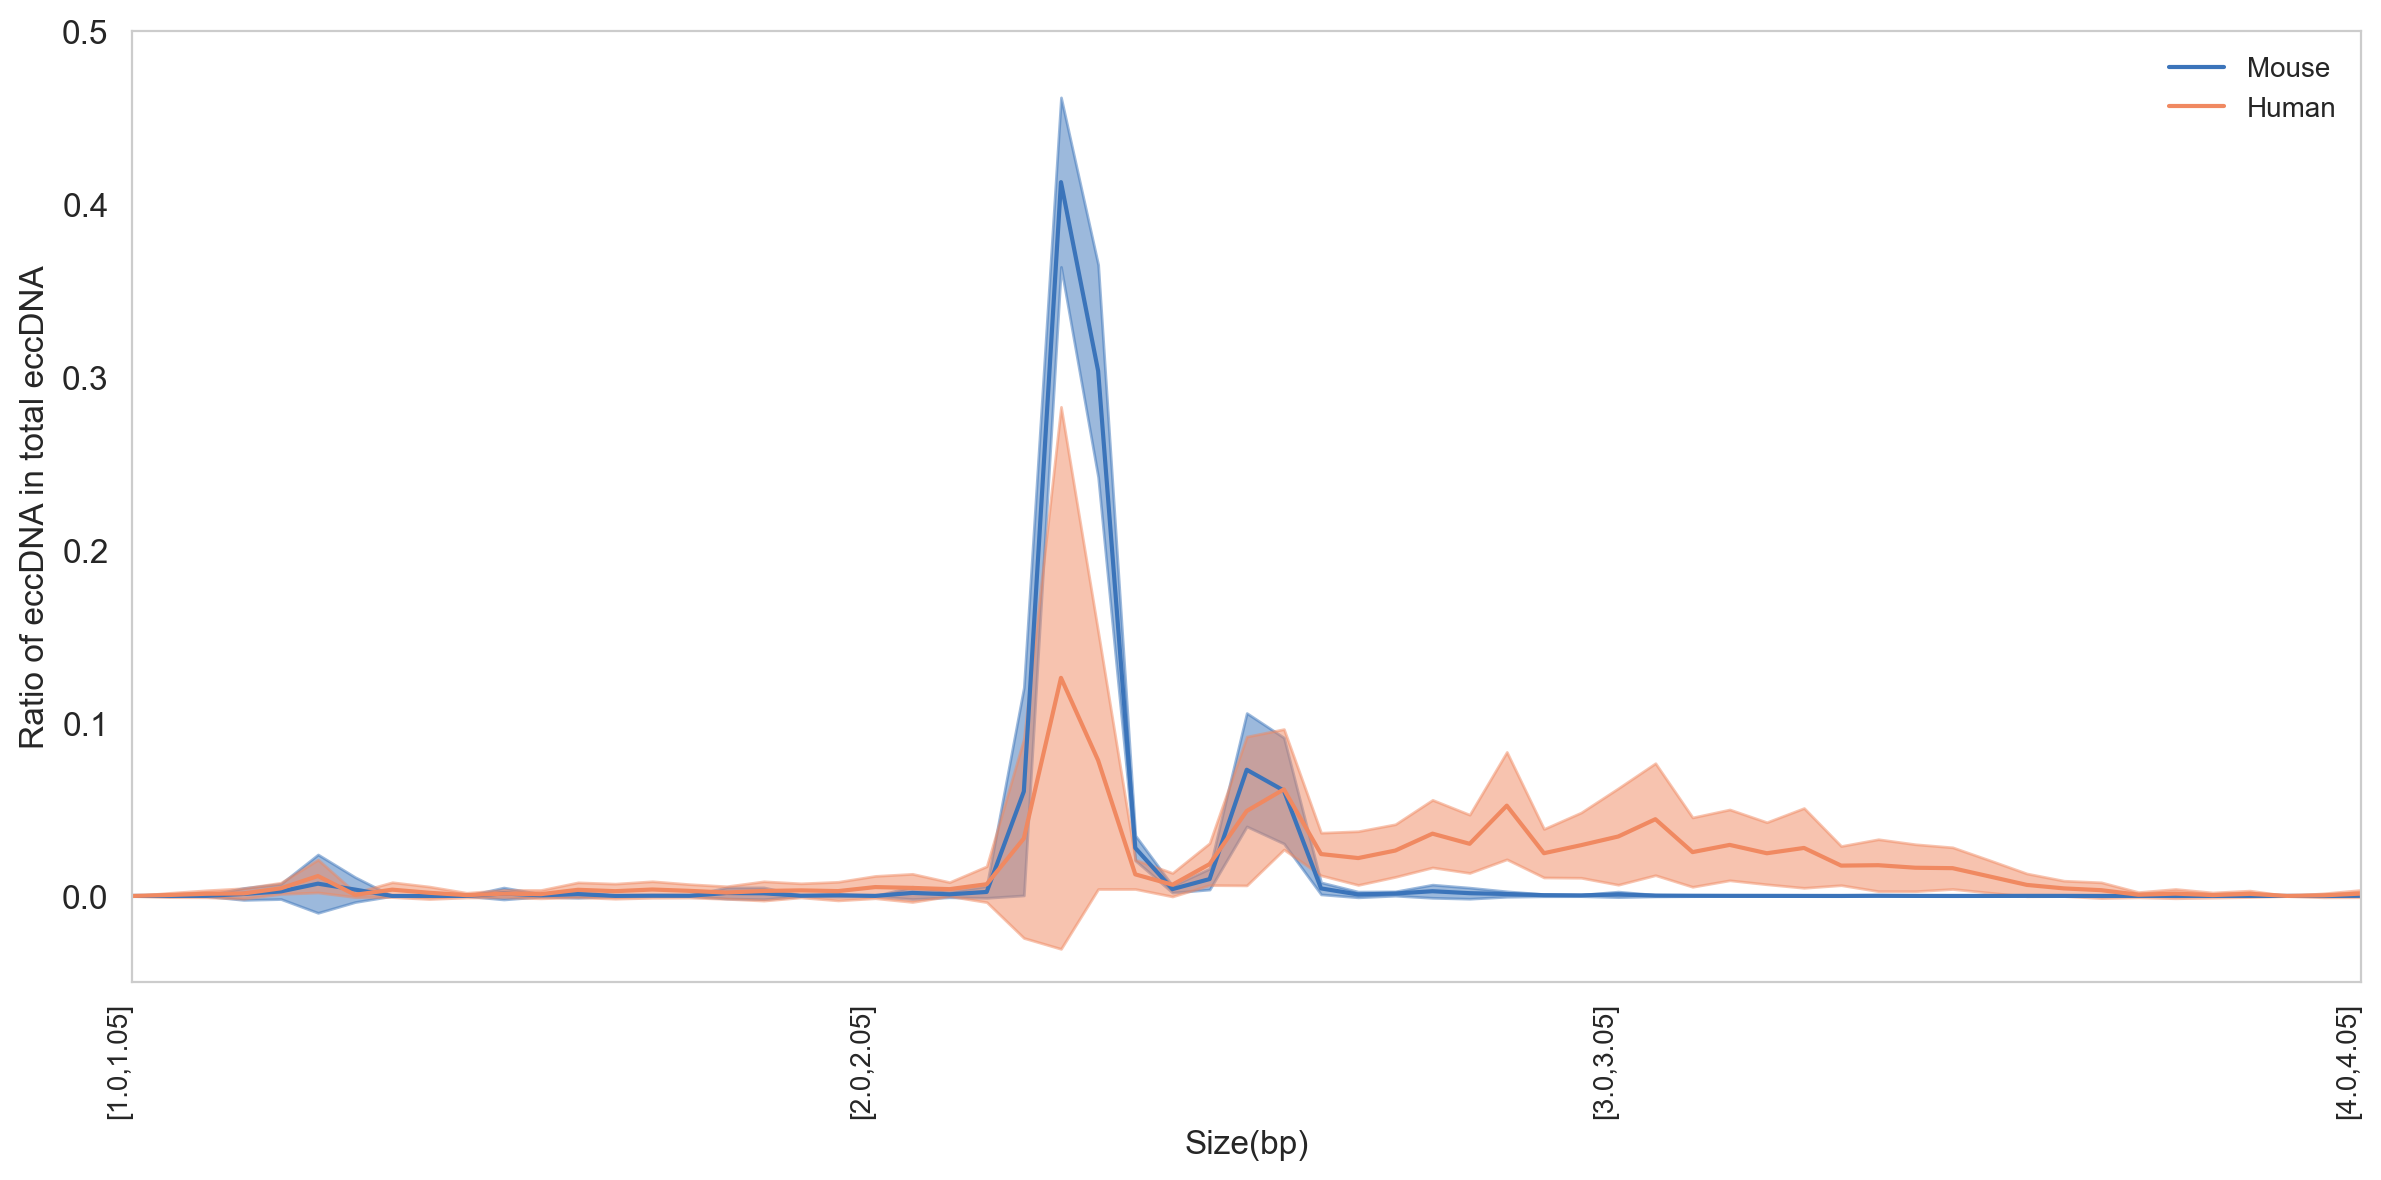

In [8]:
# 特定的横坐标区间
selected_intervals = [(1.0, 1.05), (2.0, 2.05), (3.0, 3.05), (4.0, 4.05)]

# 转换 intervals：去掉括号并转换为元组
converted_intervals = [tuple(map(float, val.strip("()[]").split(","))) for val in intervals]

# 生成 x 轴坐标
x_coords = np.arange(len(converted_intervals))

# 匹配 intervals 里的索引位置
selected_indices = [i for i, val in enumerate(converted_intervals) if val in selected_intervals]
print("Matched indices:", selected_indices)

# 检查匹配结果
if not selected_indices:
    raise ValueError("No matching intervals found! Check the format of `intervals`.")

# 创建图表
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 mouse 数据
ax1.plot(x_coords, mouse_mean, label='Mouse', color="#3B74BA")
ax1.fill_between(x_coords, mouse_mean - mouse_std, mouse_mean + mouse_std, color="#3B74BA", alpha=0.5)

# 绘制 human 数据
ax1.plot(x_coords, human_mean, label='Human', color="#F08961")
ax1.fill_between(x_coords, human_mean - human_std, human_mean + human_std, color="#F08961", alpha=0.5)

# 设置左侧 Y 轴
ax1.set_xlim([1, 4])
ax1.set_ylim([-0.05, 0.5])
ax1.set_xlabel('Size(bp)', fontsize=12)
ax1.set_ylabel('Ratio of eccDNA in total eccDNA', fontsize=12)

# **仅显示特定的 Y 轴刻度**
yticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
ax1.set_yticks(yticks)
ax1.set_yticklabels([f"{tick:.1f}" for tick in yticks], fontsize=12)
# **确保刻度线可见**
ax1.tick_params(axis='y', direction='out', length=5, width=10)

# **调整 legend 位置，避免重叠**
ax1.legend(loc="upper right", bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

# 仅显示选定的 X 轴刻度
ax1.set_xticks(selected_indices)
ax1.set_xticklabels([f"[{x[0]},{x[1]}]" for x in selected_intervals], rotation=90, ha="right", fontsize=10)

# **移除 ax1 网格线**
ax1.grid(False)

# **调整布局**
plt.tight_layout()
#plt.savefig('/home/luosongwen/scantecc/2025_03_10_Figure_result/Figure/Figure2B/Figure2B_refined.pdf',bbox_inches='tight')

# **显示图表**
plt.show()